<a href="https://colab.research.google.com/github/enamouring/Stats-Eng/blob/main/Audrey_24_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Normal Random Number Generator

In [2]:
#CDF-cumulative distribution function PDF-probability density function, add up the area

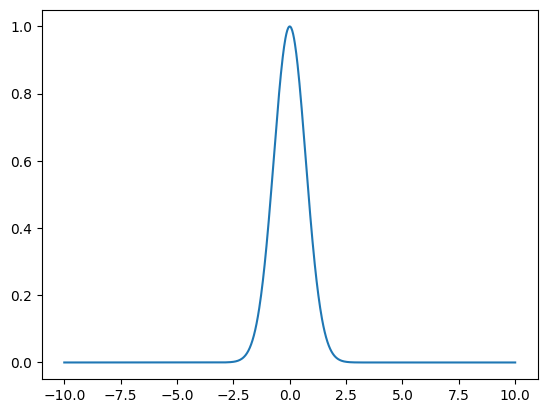

In [3]:
x = np.linspace(-10,10,1000)
y = 2.71**(-x**2) #raised to e (approx.)
plt.plot(x,y)

$e^{-x^2}$ #basic shape

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/4abaca87a10ecfa77b5a205056523706fe6c9c3f)

In [4]:
def normal_pdf(x,mu,sigma):

  return (1/(np.sqrt(2*np.pi*sigma**2)))*np.exp((-(x-mu)**2)/(2*sigma**2)) #shift and scale (changing shape of the curve)

In [5]:
x = np.linspace(-6,6,1000) #plugging in 1000 points from -6 to 6

In [6]:
mu = 0

In [7]:
sigma = 1

In [8]:
pdf = normal_pdf(x,mu,sigma)

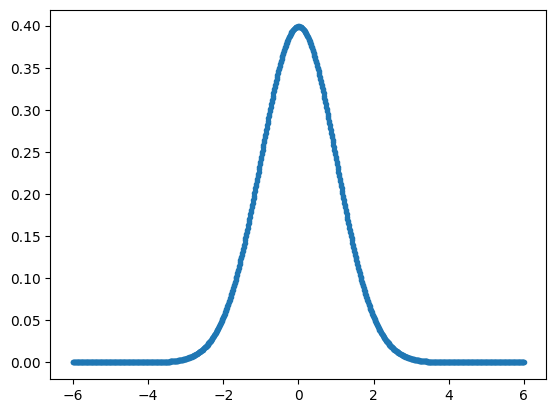

In [9]:
plt.plot(x,pdf,'.') #scale so area under the curve is always approximately 1
# plt.plot(x,y,'g.')

In [10]:
n=5
x[0:n] #go to the 5th
np.sum(x[0:n]) #summation

-29.879879879879876

In [11]:
z= np.array([1,2,3,4,5]);z #artifical array

array([1, 2, 3, 4, 5])

In [12]:
def cumulative_sum(x): #start at 0, calculates the total at every spot

  y = np.zeros(x.shape) #location to store all the totals

  for n in range(x.shape[0]): #store in x

    y[n] = np.sum(x[0:n])

  #y = y / np.max(y) scalar, can be taken out

  return y

In [13]:
cdf = cumulative_sum(pdf)

In [14]:
cumulative_sum(z) #calculates the cumulative sum of z, plug in all numbers to the left into each next corresponding spot (all n-1 terms in nth spot)

array([ 0.,  1.,  3.,  6., 10.])

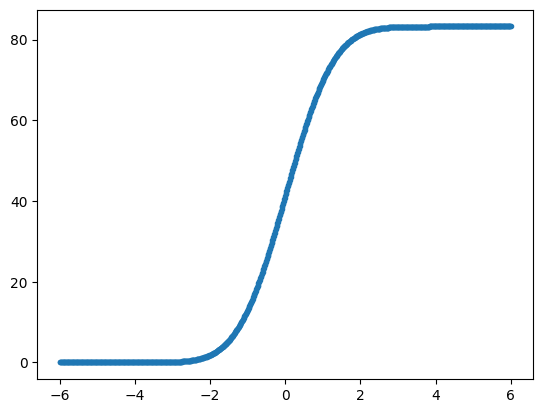

In [15]:
plt.plot(x,cdf,'.'); #goes up to 1 and peaks there; running cumulative sum (one side to the other)

In [16]:
# d_cdf = cdf[1:] - cdf[0:-1] #Demo to show that the derivative of the cdf gives you back the pdf
# plt.plot(x[1:],d_cdf,'.');  #Not required for sampling

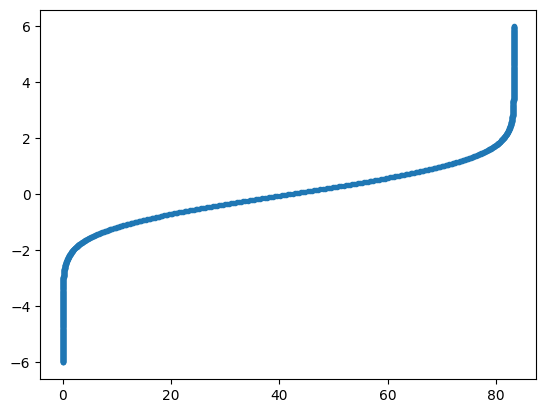

In [17]:
plt.plot(cdf,x,'.'); #flip the previous graph (x,y)->(y,x), shows the likeliness of getting a non-outlier

In [18]:
def find_nearest(array, value):

  idx = np.argmin(np.abs(array - value))

  return idx

In [19]:
print(z)

[1 2 3 4 5]


In [20]:
z=np.array([11.2,32,63,4.3,5.67]) #rewriting array

In [21]:
find_nearest(z, 22.1) #closest value to the given # [0,1,2,3,4,5] (correspondingly)

1

In [22]:
z[1]

32.0

In [23]:
find_nearest(cdf, 0.1)

247

In [24]:
x[393]

-1.2792792792792795

In [25]:
xr = np.random.random((10000,))

In [26]:
r= np.random.random(); r #create an arbitrary r and print

0.8919654350151491

In [27]:
x[find_nearest(x,r)]

0.8948948948948949

In [28]:
w = np.zeros(xr.shape[0])

for i in range(xr.shape[0]): #looping

  w[i] = x[find_nearest(cdf, xr[i])]

In [29]:
w.shape

(10000,)

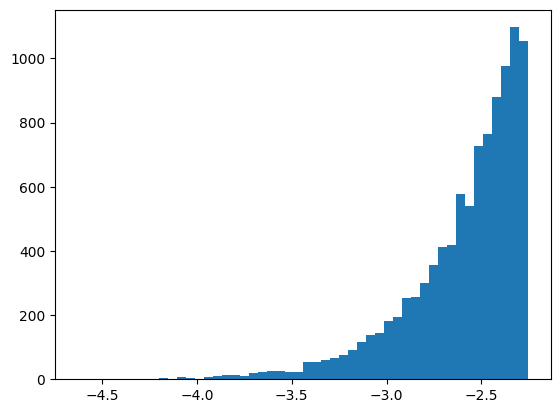

In [30]:
plt.hist(w,50);

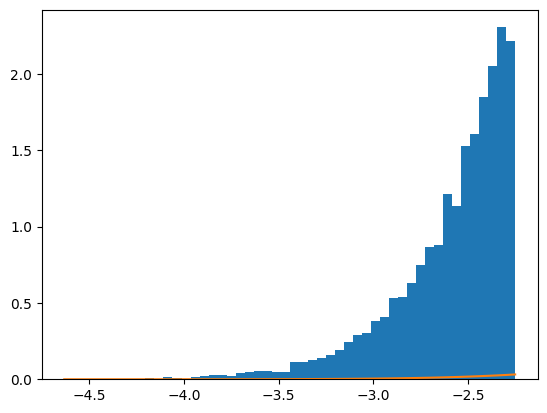

In [44]:
num_bins = 50 #sets number of bins=50 (intervals)
n,bins,patches = plt.hist(w, num_bins, density=1) #plotting w, num_bins, and density
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2)) #calculates PDF and sets it equal to y
plt.plot(bins,y) #graphs bins and the PDF values

# Homework

# Birthday Paradox

In [33]:
import random

def simulate_birthday_paradox(people, simulations):
    matches = 0

    for i in range(simulations):
        birthdays = [random.randint(1, 365) for _ in range(people)]
        if len(birthdays) != len(set(birthdays)):
            matches += 1

    probability = matches / simulations
    return probability

# Number of people in the room
people = 100

# Number of simulations
simulations = 10000

# Calculate the probability
probability = simulate_birthday_paradox(people, simulations)
probability



1.0

In [32]:
#The Birthday Paradox is a paradox since over countless simulations of 100 individuals, there is a 100% chance for 2 people to share the same birthday. This is interesting because there is 365 days in a year but still 2 people out of 100 most likely will share the same birthday. This code illustrates this by doing a loop for a number of 'simulations' and randomizes the birthdays for n=100 amount of people. Then it checks if the lengths of the birthdays list is different from the set and if it is, it adds a match count. It runs this code for m number of times where m=10000 is the amount of simulations. Then the probability is calculated by matches/simulations. This would result in the probability of exactly 1 pair of birthdays per simulation.

# Monty Hall

In [38]:
def simulate_monty_hall_final(simulations): #3 doors, pick a door, behind one is a car others have junk
    wins_switching = 0
    wins_staying = 0

    for _ in range(simulations):
        # Randomly assign the car to a door (1, 2, or 3)
        car_door = random.randint(1, 3)
        # Player makes an initial choice
        player_choice = random.randint(1, 3)

        # Host opens a door, which is neither the player's choice nor the car door
        for host_choice in [1, 2, 3]:
            if host_choice != car_door and host_choice != player_choice:
                break

        # Find the remaining door for the player to switch to
        for switch_choice in [1, 2, 3]:
            if switch_choice != player_choice and switch_choice != host_choice:
                break

        # Count the number of wins for staying with the initial choice
        if player_choice == car_door:
            wins_staying += 1

        # Count the number of wins for switching to the other door
        if switch_choice == car_door:
            wins_switching += 1

    # Calculate the probabilities of winning by staying and switching
    probability_staying = wins_staying / simulations
    probability_switching = wins_switching / simulations

    return probability_staying, probability_switching

# Running the final version of the simulation
final_probability_staying, final_probability_switching = simulate_monty_hall_final(simulations)
final_probability_staying, final_probability_switching #(prob of winning if you say, prob of winning if you switch)


(0.3355, 0.6645)

In [35]:
#The code showcases the Monty Hall problem where 1 player randomly selects a door in hopes that a car is behind it for a number of n=10000 simulations. First the car is placed behind door 1, 2, or 3, and then the player chooses a random door. Then in the next line the host opens a door which is not the players door or the car door and removes it from the list. Then it recalls the only remaining door for the player to switch to and increments both choices by the number of simulation wins. Finally, it calculates the number of probability of winning if the player stays or switches by checking if the players or switch choice is the car door while returning the odds. The result is one is 2x more than likely to win after they switch their door.

# Simple Craps

In [42]:
def simulate_dice_game(simulations):
    wins = 0

    for _ in range(simulations):
        # Roll two six-sided dice
        roll = random.randint(1, 6) + random.randint(1, 6)

        # Check for immediate win or loss
        if roll in [7, 11]:
            wins += 1
            continue
        elif roll in [2, 3, 12]:
            continue

        # Save the initial roll
        initial_roll = roll

        # Re-roll phase
        while True:
            roll = random.randint(1, 6) + random.randint(1, 6)
            if roll == 7:  # Loss condition
                break
            elif roll == initial_roll:  # Win condition
                wins += 1
                break

    probability_of_winning = wins / simulations
    return probability_of_winning

# Number of simulations
simulations = 10000

# Calculate the probability
probability_of_winning = simulate_dice_game(simulations)
probability_of_winning


0.4982

In [41]:
#Rolling two 6-sided die, by generating random integers between 1 and 6 and adding them. The immediate win conditions are if the sum is 7 or 11 (if this is the case the code will add to the wins), and losses are the sums 2, 3, and 12 (is not counted). If the roll is not an immediate win or loss the code saves the initial roll and enters the reroll phase. The code checks if the roll is a 7 and if it is the player loses, but if the new roll adds to the same sum of the original roll the player wins (+1 win). This is then iterated over the number of the total simulations (10000) and to calculate the probability of winning the total wins are divided by the number of simulations. The result is the probability of winning this game is a little less than 50%.

# Collector's Card Paradox


In [43]:
def simulate_card_collectors_problem(n, simulations):
    total_card_packs_bought = 0

    for _ in range(simulations):
        collected_characters = set()
        card_packs_bought = 0

        # Buy card packs until all characters are collected
        while len(collected_characters) < n:
            new_card = random.randint(1, n)
            collected_characters.add(new_card)
            card_packs_bought += 1

        total_card_packs_bought += card_packs_bought

    # Calculate the average number of card packs needed
    average_card_packs_needed = total_card_packs_bought / simulations
    return average_card_packs_needed

# Number of different characters
n = 10

# Calculate the expected number of card packs
expected_card_packs = simulate_card_collectors_problem(n, simulations)
expected_card_packs


29.321

In [ ]:
#This code checks over m simulations how long it takes until all different character cards (n) are collected. The code starts at 0 character cards and loops for as long as the collected character count is less than the total of different characters. Each time it is less it buys a new card pack and draws a character card between 1 and n and adds it to the collected character set (no changes for duplicates). This is recorded through a collected character set that counts the individual characters and the card packs bought by incrementing this number each time the while loop runs. The code then returns these values once all cards are collected and calculates the average card packs needed by dividing the total card packs bought by the number of simulations. This then gives the expected card packs to get n characters.

In [ ]:
import random

def simulate_sock_drawer_problem(n, simulations):
    total_draws = 0

    for _ in range(simulations):
        socks = {}
        draws = 0

        while True:
            # Randomly draw a sock
            sock_color = random.randint(1, n)
            draws += 1

            # Update the count for this color
            if sock_color in socks:
                socks[sock_color] += 1
            else:
                socks[sock_color] = 1

            # Check for a pair
            if socks[sock_color] == 2:
                break

        total_draws += draws

    # Calculate the average number of draws needed
    average_draws_needed = total_draws / simulations
    return average_draws_needed

# Number of pairs of socks
n = 10

# Number of simulations
simulations = 10000

# Calculate the expected number of draws
expected_draws = simulate_sock_drawer_problem(n, simulations)
expected_draws


4.6864